<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [16]:
# insert code here
from numpy import loadtxt

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Checking keras and tensorflow versions
print("Keras version:", keras.__version__)
print("Tensorflow version:", tf.__version__)

# Import keras
from keras.models import Sequential
from keras.layers import Dense

# Importing sklearn and Checking sklearn version
import sklearn
print ("Sklearn version:", sklearn.__version__)
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from keras.utils import to_categorical

import numpy as np
import urllib

Keras version: 2.4.0
Tensorflow version: 2.4.1
Sklearn version: 0.24.1


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
# insert code here
from sklearn.datasets import load_diabetes

In [4]:
load_diabetes

<function sklearn.datasets._base.load_diabetes(*, return_X_y=False, as_frame=False)>

In [5]:
#Load the dataset
diabetes = load_diabetes()

In [35]:
# To know more about the dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### Prepare input data

In [6]:
# Input (X)
X = diabetes.data

# X data shape
print("X is a", type(X))

# Rows and columns shape
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# X columns as n_cols
n_cols = X.shape[1]

# output (y)
y = diabetes.target

print("First 8 values in y: ", y[:8])

X is a <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 8 values in y:  [151.  75. 141. 206. 135.  97. 138.  63.]


In [8]:
X.shape

(442, 10)

In [9]:
# Rechecking the number of columns
n_cols

10

In [48]:
# Checking the first row of input columns
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [10]:
# Checking number of observations in output variable
len(y)

442

In [19]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### Split the data (training/test)

In [43]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42)

### Create the model's architecture

In [44]:
# insert code here
# define the keras model
model = Sequential()

# The first line of code define the input or visible layer (dense layer) and the first hidden layer
model.add(Dense(15, activation='relu', input_shape = (n_cols, )))

# The second hidden layer has 5 nodes and uses the relu activation function.
model.add(Dense(5, activation='relu'))

# The output layer has one node and uses the linear activation function.
model.add(Dense(1, activation='linear')) # comprising value in probabilities, not used for regression (for regression use linear), used for classification. If target is binary, the output layer can be sigmoid (yes or no)

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [46]:
# insert code here. Mean Squarred Error (MSE) is the default loss and also the metrics to evaluate performance used for regression problems
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

### Fit the training data

In [47]:
# Fit the model
history = model.fit(
    X_train, 
    y_train, 
    validation_split = 0.25,
    epochs=100, 
    batch_size=10,
    verbose=0)

### Create predictions

In [48]:
# insert code here
predictions = model.predict_classes(X_test)

### Evaluate the model

In [49]:
# insert code here
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.2f' % score[0])

4/4 [==============================] - 0s 2ms/step - loss: 3105.4805 - mse: 3105.4805

Test loss: 3105.48


In [50]:
# score
score

[3105.48046875, 3105.48046875]

In [51]:
# Find RMSE
score[0] ** (1/2)

55.7268379575766

In [52]:
y.mean()

152.13348416289594

In [53]:
y.std()

77.00574586945044

In [54]:
y.min()

25.0

In [55]:
y.max()

346.0

### Visualisation of cost

In [56]:
# insert code here
history.history

{'loss': [31546.123046875,
  31516.27734375,
  31466.62109375,
  31405.7421875,
  31328.0390625,
  31233.25390625,
  31116.09765625,
  30977.517578125,
  30812.880859375,
  30617.876953125,
  30394.615234375,
  30137.294921875,
  29845.943359375,
  29519.326171875,
  29149.490234375,
  28750.708984375,
  28301.462890625,
  27812.45703125,
  27243.77734375,
  26579.8984375,
  25838.591796875,
  25030.994140625,
  24148.69140625,
  23211.451171875,
  22244.365234375,
  21208.41796875,
  20150.837890625,
  19063.30078125,
  17983.287109375,
  16879.775390625,
  15781.8447265625,
  14715.158203125,
  13648.880859375,
  12641.408203125,
  11680.4462890625,
  10751.0703125,
  9920.810546875,
  9123.3896484375,
  8402.0654296875,
  7754.4970703125,
  7170.1474609375,
  6666.052734375,
  6209.8876953125,
  5830.08056640625,
  5496.9228515625,
  5228.19091796875,
  5011.51220703125,
  4808.10009765625,
  4654.56689453125,
  4531.38623046875,
  4429.4189453125,
  4343.5849609375,
  4276.47363281

In [57]:
history.history['val_mse']

[24807.947265625,
 24768.884765625,
 24721.494140625,
 24661.33203125,
 24587.515625,
 24497.54296875,
 24390.0625,
 24260.904296875,
 24108.826171875,
 23935.04296875,
 23731.3984375,
 23499.970703125,
 23239.0234375,
 22946.052734375,
 22627.669921875,
 22269.033203125,
 21884.29296875,
 21445.62109375,
 20927.58984375,
 20342.154296875,
 19696.90625,
 18994.826171875,
 18252.361328125,
 17472.0234375,
 16628.7109375,
 15784.2021484375,
 14927.81640625,
 14064.7841796875,
 13169.7255859375,
 12299.4130859375,
 11457.2255859375,
 10623.779296875,
 9846.22265625,
 9087.9443359375,
 8359.2548828125,
 7722.5234375,
 7111.35009765625,
 6586.1552734375,
 6126.140625,
 5721.32958984375,
 5373.826171875,
 5067.333984375,
 4830.18505859375,
 4633.51123046875,
 4489.0341796875,
 4372.57470703125,
 4280.18896484375,
 4224.02734375,
 4185.607421875,
 4159.40478515625,
 4142.50390625,
 4133.884765625,
 4132.43505859375,
 4128.53369140625,
 4131.21923828125,
 4124.26123046875,
 4119.60302734375,
 

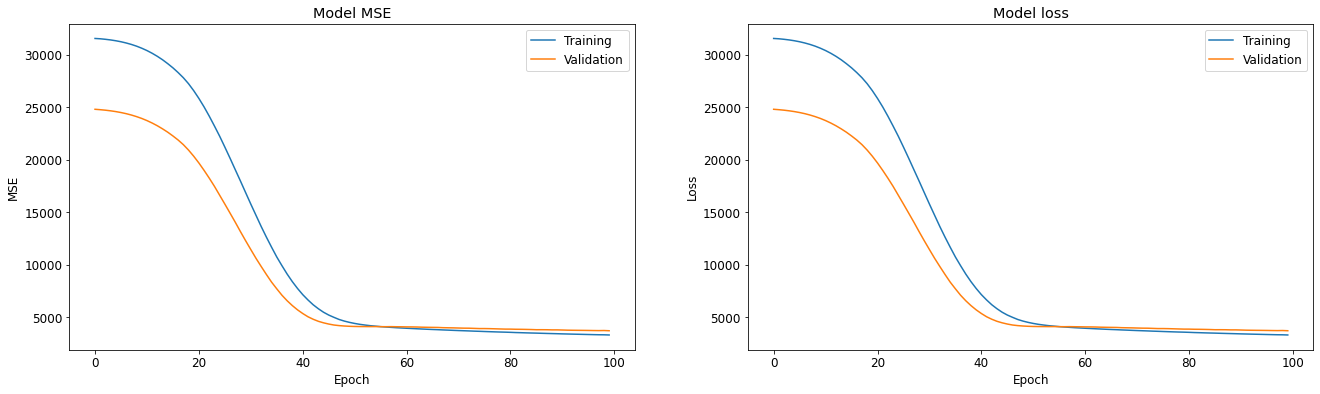

In [58]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 12})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training and validation loss values 
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [59]:
# Calculate R2 and adjsuted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

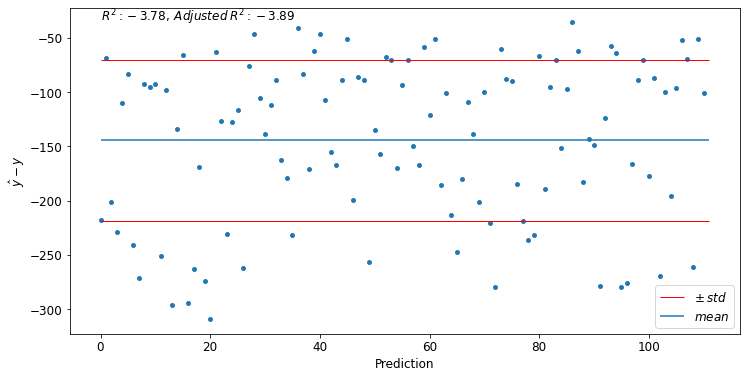

In [60]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (12,6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw=1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label= '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw=1)

plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend(loc='lower right')

plt.text(0, difference.max() * 0.95,
        '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2), fontsize=12)

plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



